In [ ]:
import numpy as np
import keras

import os
import cv2
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

import time
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt 
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [ ]:
train_path= '/content/drive/MyDrive/columbia/train'
valid_path= '/content/drive/MyDrive/columbia/test'
batch_size=128
train_batches =ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),batch_size=batch_size)
valid_batches =ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),batch_size=batch_size)

Found 4699 images belonging to 5 classes.
Found 1180 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
steps_train = train_batches.n / batch_size
steps_train


36.7109375

In [ ]:
steps_valid = valid_batches.n / batch_size
steps_valid


9.21875

In [ ]:
num_classes = train_batches.num_classes
num_classes

5

In [ ]:
cls_train = train_batches.classes
cls_test =  valid_batches.classes
class_names = list(train_batches.class_indices.keys())
class_names

['-15P', '-30P', '0P', '15P', '30P']

In [ ]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]
image_paths_train = path_join(train_path, train_batches.filenames)
image_paths_test = path_join(valid_path, valid_batches.filenames)

def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]
                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]
    # Convert to a numpy array and return it.
    return np.asarray(images)

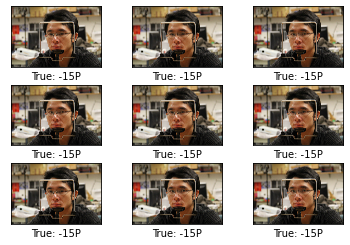

In [ ]:
# Load the first images from the train-set.
images = load_images(image_paths=image_paths_train[0:9])
# Get the true classes for those images.
cls_true = cls_train[0:9]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=True)

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:

epochs=10
#compile the model
#model.compile(Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

#compile the modele sur batch_size= 32

start = time.time()
history = model.fit_generator(generator=train_batches,
                                  epochs=epochs,
                                  steps_per_epoch=steps_train,
                                  validation_data=valid_batches,
                                  validation_steps=steps_valid)
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))
result = model.evaluate_generator(valid_batches, steps=1)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
36/36 [==============================] - 10817s 294s/step - loss: 243.7492 - accuracy: 0.3499 - val_loss: 1.0229 - val_accuracy: 0.6051
Epoch 2/10
36/36 [==============================] - 10860s 296s/step - loss: 0.5902 - accuracy: 0.7653 - val_loss: 0.0997 - val_accuracy: 0.9746
Epoch 3/10
 9/36 [======>.......................] - ETA: 2:00:53 - loss: 0.0772 - accuracy: 0.9767

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


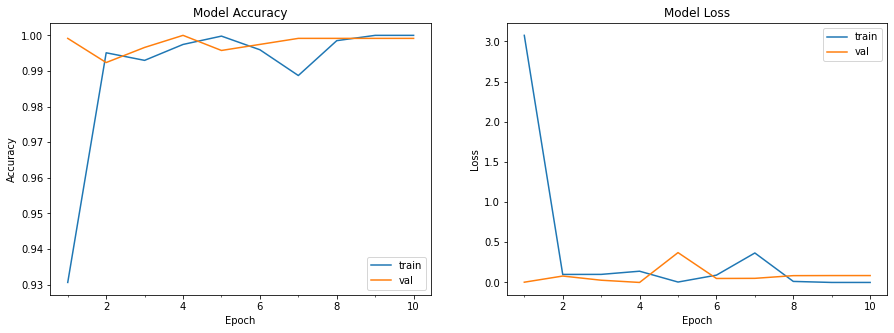

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(history)

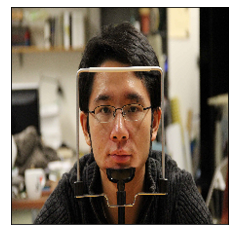

	-15P ==> 0.00 %
	-30P ==> 0.00 %
	0P ==> 100.00 %
	15P ==> 0.00 %
	30P ==> 0.00 %


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/columbia/test/0P/0001_2m_0P_0V_0H.jpg', target_size = (224,224))
plt.imshow(test_image, interpolation = 'spline16')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
result= model.predict (test_image)
t=0
i=0
for label in class_names:
        print("\t%s ==> %.2f %%" % (label, result[t][i]*100))
        i = i + 1